In [3]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


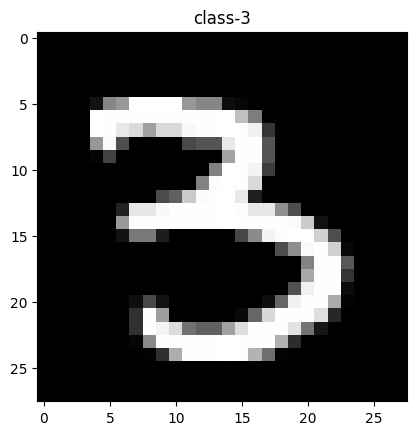

Train image 25091-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  19 133 151 254 254 254 254 150 133 133  13   6   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 254 253 253 253 253 253 253 253 253 253 254 191 125   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 254 253 231 217 159 217 217 248 253 253 254 253 240  53
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 150 249  78   0  

In [4]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = "/home/sysadm/ML_Assignment/"# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [5]:
train_images_flatten = train_images.flatten().reshape(60000,28*28).astype('float64') 

validation_size = int(len(train_images_flatten) * 0.2)

x_val= train_images_flatten[:validation_size]
y_val=train_labels[:validation_size]
x_train= train_images_flatten[validation_size:]
y_train=train_labels[validation_size:]
print('Train data (X) size: {}, and labels (Y) size: {}' .format(x_train.shape, y_train.shape))
print('val data(X) size: {}, and labels (Y) size: {}' .format(x_val.shape, y_val.shape))


Train data (X) size: (48000, 784), and labels (Y) size: (48000,)
val data(X) size: (12000, 784), and labels (Y) size: (12000,)


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [6]:
# Your k-NN algorithm script/code 


In [9]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def distance_(X_train, X_test):
    distance_matrix = np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        distance_matrix[i] = distances
    return distance_matrix

def predict(Y_train, k, distance_matrix):
    predictions = []
    for distances in distance_matrix:
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [Y_train[j] for j in k_indices]
        label_counts = np.bincount(k_nearest_labels)
        prediction = np.argmax(label_counts)
        predictions.append(prediction)
    return predictions

a=distance_(x_train,x_val)

accuracy_euclidian=[]
for k in range(1,26,2):
    result=predict(y_train,k,a)
    acc=np.mean(result==y_val)
    accuracy_euclidian.append(acc)


In [10]:
accuracy_euclidian

[0.97,
 0.97175,
 0.96975,
 0.9680833333333333,
 0.9655833333333333,
 0.9646666666666667,
 0.9635833333333333,
 0.962,
 0.9608333333333333,
 0.9596666666666667,
 0.9591666666666666,
 0.9584166666666667,
 0.9565833333333333]

In [11]:
import numpy as np


def distance_m(X_train, X_test):
    distance_matrix_m= np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.sum(np.abs(X_train - test_point), axis=1)
        distance_matrix_m[i] = distances
    return distance_matrix_m

def predict(Y_train, k, distance_matrix):
    predictions = []
    for distances in distance_matrix:
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [Y_train[j] for j in k_indices]
        label_counts = np.bincount(k_nearest_labels)
        prediction = np.argmax(label_counts)
        predictions.append(prediction)
    return predictions

a=distance_m(x_train,x_val)

accuracy_manhattan=[]
for k in range(1,26,2):
    result=predict(y_train,k,a)
    acc=np.mean(result==y_val)
    accuracy_manhattan.append(acc)


In [12]:
accuracy_manhattan

[0.963,
 0.96475,
 0.9635,
 0.9625,
 0.9596666666666667,
 0.957,
 0.9565,
 0.95525,
 0.9545,
 0.95175,
 0.9511666666666667,
 0.9503333333333334,
 0.9485]

In [6]:
import numpy as np

#chebyshev

def distance_c(X_train, X_test):
    distance_matrix_c= np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.max(np.abs(X_train - test_point), axis=1)
        distance_matrix_c[i] = distances
    return distance_matrix_c

def predict(Y_train, k, distance_matrix):
    predictions = []
    for distances in distance_matrix:
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [Y_train[j] for j in k_indices]
        label_counts = np.bincount(k_nearest_labels)
        prediction = np.argmax(label_counts)
        predictions.append(prediction)
    return predictions

a=distance_c(x_train,x_val)

accuracy_chebyshev=[]
for k in range(1,26,2):
    result=predict(y_train,k,a)
    acc=np.mean(result==y_val)
    accuracy_chebyshev.append(acc)


In [7]:
accuracy_chebyshev

[0.81375,
 0.7978333333333333,
 0.8035833333333333,
 0.7975,
 0.7913333333333333,
 0.79125,
 0.7889166666666667,
 0.7894166666666667,
 0.7879166666666667,
 0.7819166666666667,
 0.7793333333333333,
 0.7770833333333333,
 0.7760833333333333]

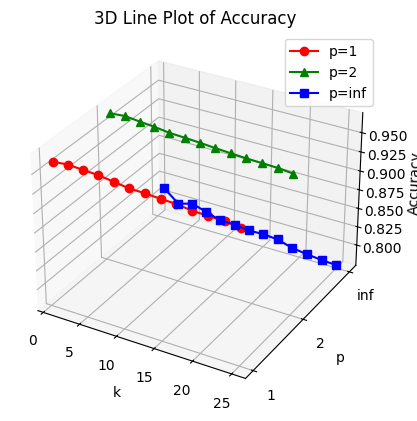

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
p_values = [1, 2, np.inf]
k_values = [i for i in range(1,26,2)]
acc_values = [accuracy_manhattan,accuracy_euclidian,accuracy_chebyshev]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(k_values, [1]*len(k_values), accuracy_manhattan, color='r', marker='o', label='p=1')
ax.plot(k_values, [2]*len(k_values), accuracy_euclidian, color='g', marker='^', label='p=2')
ax.plot(k_values, [3]*len(k_values), accuracy_chebyshev, color='b', marker='s', label='p=inf')

ax.set_xlabel('k')
ax.set_ylabel('p')
ax.set_zlabel('Accuracy')
ax.set_title('3D Line Plot of Accuracy')

ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['1', '2', 'inf'])

ax.legend()

plt.show()



In [14]:
test_images_flatten = test_images.flatten().reshape(10000,28*28).astype('float64') 

def distance_(X_train, X_test):
    distance_matrix = np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        distance_matrix[i] = distances
    return distance_matrix

def predict(Y_train, k, distance_matrix):
    predictions = []
    for distances in distance_matrix:
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [Y_train[j] for j in k_indices]
        label_counts = np.bincount(k_nearest_labels)
        prediction = np.argmax(label_counts)
        predictions.append(prediction)
    return predictions

x=distance_(x_train,test_images_flatten)


result=predict(y_train,3,x)
acc_final=np.mean(result==test_labels)
print(acc_final)

0.9687
